In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
model_logistic = LogisticRegression()
model_tree = DecisionTreeClassifier()
model_forest = RandomForestClassifier()
model_svm = SVC()
model_knn = KNeighborsClassifier()
model_nb = GaussianNB()
model_xgb = XGBClassifier()
model_nn = MLPClassifier()

In [ ]:
data = pd.read_csv('cardio_train.csv',delimiter=';')
data_df = pd.DataFrame(data)
data_df = data_df.drop(['id'],axis=1)
data_df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


# New Section

In [ ]:
data_df.shape

(70000, 12)

In [ ]:
X = data_df.iloc[:,0:-1].to_numpy()#normalize the X
print(X.shape)
y = data_df.iloc[:,-1].to_numpy()
print(y.shape)

(70000, 11)
(70000,)


In [ ]:
#remember to split your data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [ ]:
# Initialize and train logistic regression model
logistic_model = LogisticRegression(max_iter=10000)  # You can adjust max_iter based on convergence
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression: {accuracy:.2f}")

Accuracy of Logistic Regression: 0.70


In [ ]:
# Fitting models to training data
models = [model_logistic, model_tree, model_forest, model_svm, model_knn, model_nb, model_xgb, model_nn]
for model in models:
    model.fit(X_train, y_train)

In [ ]:
# Evaluation dictionaries to store results
accuracy = {}
precision = {}
recall = {}
f1 = {}
conf_matrix = {}

model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'XGBoost', 'Neural Network']
for i, model in enumerate(models):
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy[model_names[i]] = accuracy_score(y_test, y_pred)
    precision[model_names[i]] = precision_score(y_test, y_pred)
    recall[model_names[i]] = recall_score(y_test, y_pred)
    f1[model_names[i]] = f1_score(y_test, y_pred)
    conf_matrix[model_names[i]] = confusion_matrix(y_test, y_pred)

# Print evaluation metrics for each model
for model_name in model_names:
    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {accuracy[model_name]:.4f}")
    print(f"Precision: {precision[model_name]:.4f}")
    print(f"Recall: {recall[model_name]:.4f}")
    print(f"F1-score: {f1[model_name]:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix[model_name]}\n")

Metrics for Logistic Regression:
Accuracy: 0.6981
Precision: 0.7125
Recall: 0.6661
F1-score: 0.6885
Confusion Matrix:
[[5103 1885]
 [2341 4671]]

Metrics for Decision Tree:
Accuracy: 0.6310
Precision: 0.6294
Recall: 0.6402
F1-score: 0.6348
Confusion Matrix:
[[4345 2643]
 [2523 4489]]

Metrics for Random Forest:
Accuracy: 0.7156
Precision: 0.7224
Recall: 0.7021
F1-score: 0.7121
Confusion Matrix:
[[5096 1892]
 [2089 4923]]

Metrics for SVM:
Accuracy: 0.6054
Precision: 0.6159
Recall: 0.5635
F1-score: 0.5885
Confusion Matrix:
[[4524 2464]
 [3061 3951]]

Metrics for KNN:
Accuracy: 0.6823
Precision: 0.6891
Recall: 0.6663
F1-score: 0.6775
Confusion Matrix:
[[4880 2108]
 [2340 4672]]

Metrics for Naive Bayes:
Accuracy: 0.5940
Precision: 0.7141
Recall: 0.3159
F1-score: 0.4380
Confusion Matrix:
[[6101  887]
 [4797 2215]]

Metrics for XGBoost:
Accuracy: 0.7357
Precision: 0.7547
Recall: 0.6998
F1-score: 0.7262
Confusion Matrix:
[[5393 1595]
 [2105 4907]]

Metrics for Neural Network:
Accuracy: 0.50

In [ ]:
import keras
from keras import layers
from tensorflow.keras.callbacks import LearningRateScheduler

In [ ]:
# Define Sequential model with 3 layers
model = keras.Sequential()
# Create 3 layers
model.add(layers.Dense(128, activation="relu",input_shape=(11,)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(8, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

# Define a learning rate schedule function
def lr_schedule(epoch):
    initial_lr = 0.001  # Initial learning rate
    decay_rate = 0.1    # Decay rate

    # Learning rate schedule: reduce by decay_rate every 10 epochs
    if epoch % 10 == 0 and epoch != 0:
        return initial_lr * (decay_rate ** (epoch // 10))
    else:
        return initial_lr

# Create a learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)


#compiling model
opt = keras.optimizers.Adam(learning_rate=lr_sheduler)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics = 'accuracy')

# Fit the model.
history = model.fit(
    x=X_train_normalized,
    y=y_train,
    batch_size=256,
    epochs=1024,
    validation_split=0.2,
    verbose=1,
    callbacks=[lr_scheduler]  # Pass the learning rate scheduler callback
)

Epoch 1/1024
175/175 [==============================] - 4s 8ms/step - loss: 0.6473 - accuracy: 0.6223 - val_loss: 0.6321 - val_accuracy: 0.6456 - lr: 0.0010
Epoch 2/1024
175/175 [==============================] - 1s 4ms/step - loss: 0.6331 - accuracy: 0.6386 - val_loss: 0.6314 - val_accuracy: 0.6427 - lr: 0.0010
Epoch 3/1024
175/175 [==============================] - 1s 4ms/step - loss: 0.6297 - accuracy: 0.6423 - val_loss: 0.6258 - val_accuracy: 0.6508 - lr: 0.0010
Epoch 4/1024
175/175 [==============================] - 1s 4ms/step - loss: 0.6274 - accuracy: 0.6450 - val_loss: 0.6248 - val_accuracy: 0.6511 - lr: 0.0010
Epoch 5/1024
175/175 [==============================] - 1s 4ms/step - loss: 0.6265 - accuracy: 0.6466 - val_loss: 0.6234 - val_accuracy: 0.6531 - lr: 0.0010
Epoch 6/1024
175/175 [==============================] - 1s 6ms/step - loss: 0.6256 - accuracy: 0.6464 - val_loss: 0.6243 - val_accuracy: 0.6514 - lr: 0.0010
Epoch 7/1024
175/175 [==============================] - 1s

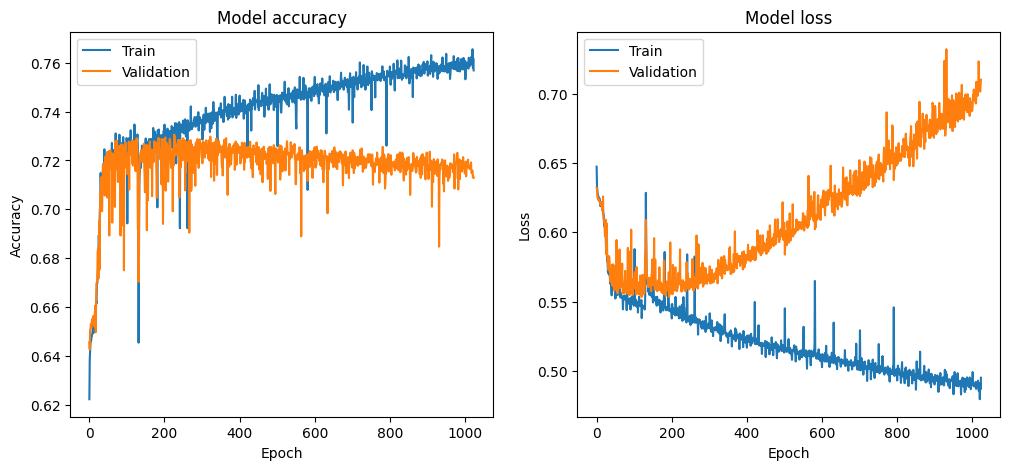

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


438/438 [==============================] - 1s 1ms/step


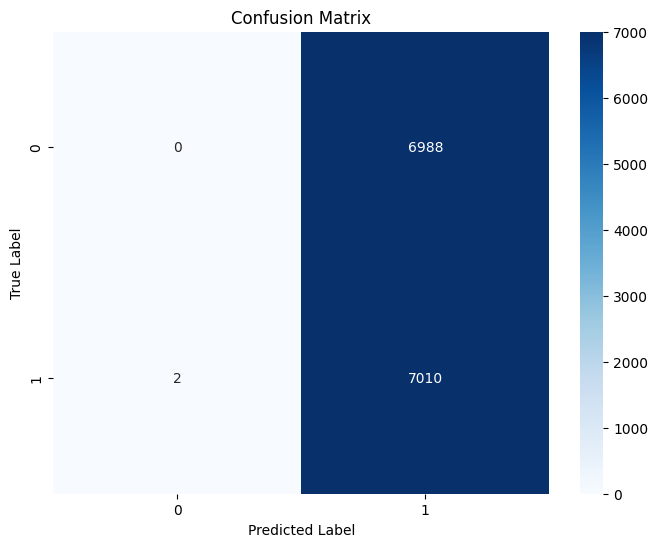

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5) # Convert probabilities to binary predictions

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Retrieve the last entry in the accuracy and validation accuracy lists
final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

print(f"Final training accuracy: {final_train_accuracy * 100:.2f}%")
print(f"Final validation accuracy: {final_val_accuracy * 100:.2f}%")


Final training accuracy: 75.68%
Final validation accuracy: 71.29%
